# 02.05 - Data distributions
In this section, we visualize the distribution of the independent and Target variables

In [2]:
# import requiered libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the 'all_train.csv' file, to get a table of time resolution
all_train = pd.read_csv( '../../data/interim/all_train.csv' ,  parse_dates = [0] ,  index_col = 0 )
all_train.head()

# NOTE: some entries in activity are really the same category. For example 'Walk' & 'Walking'
# Here, we convert those cases to the same category
conv_d = {
    'Walking':'Walk',
    'Running':'Run',
    'Weights':'Strength training'

}

all_train['activity'] = all_train['activity'].replace( conv_d )

## Distribution of all the features and response variable


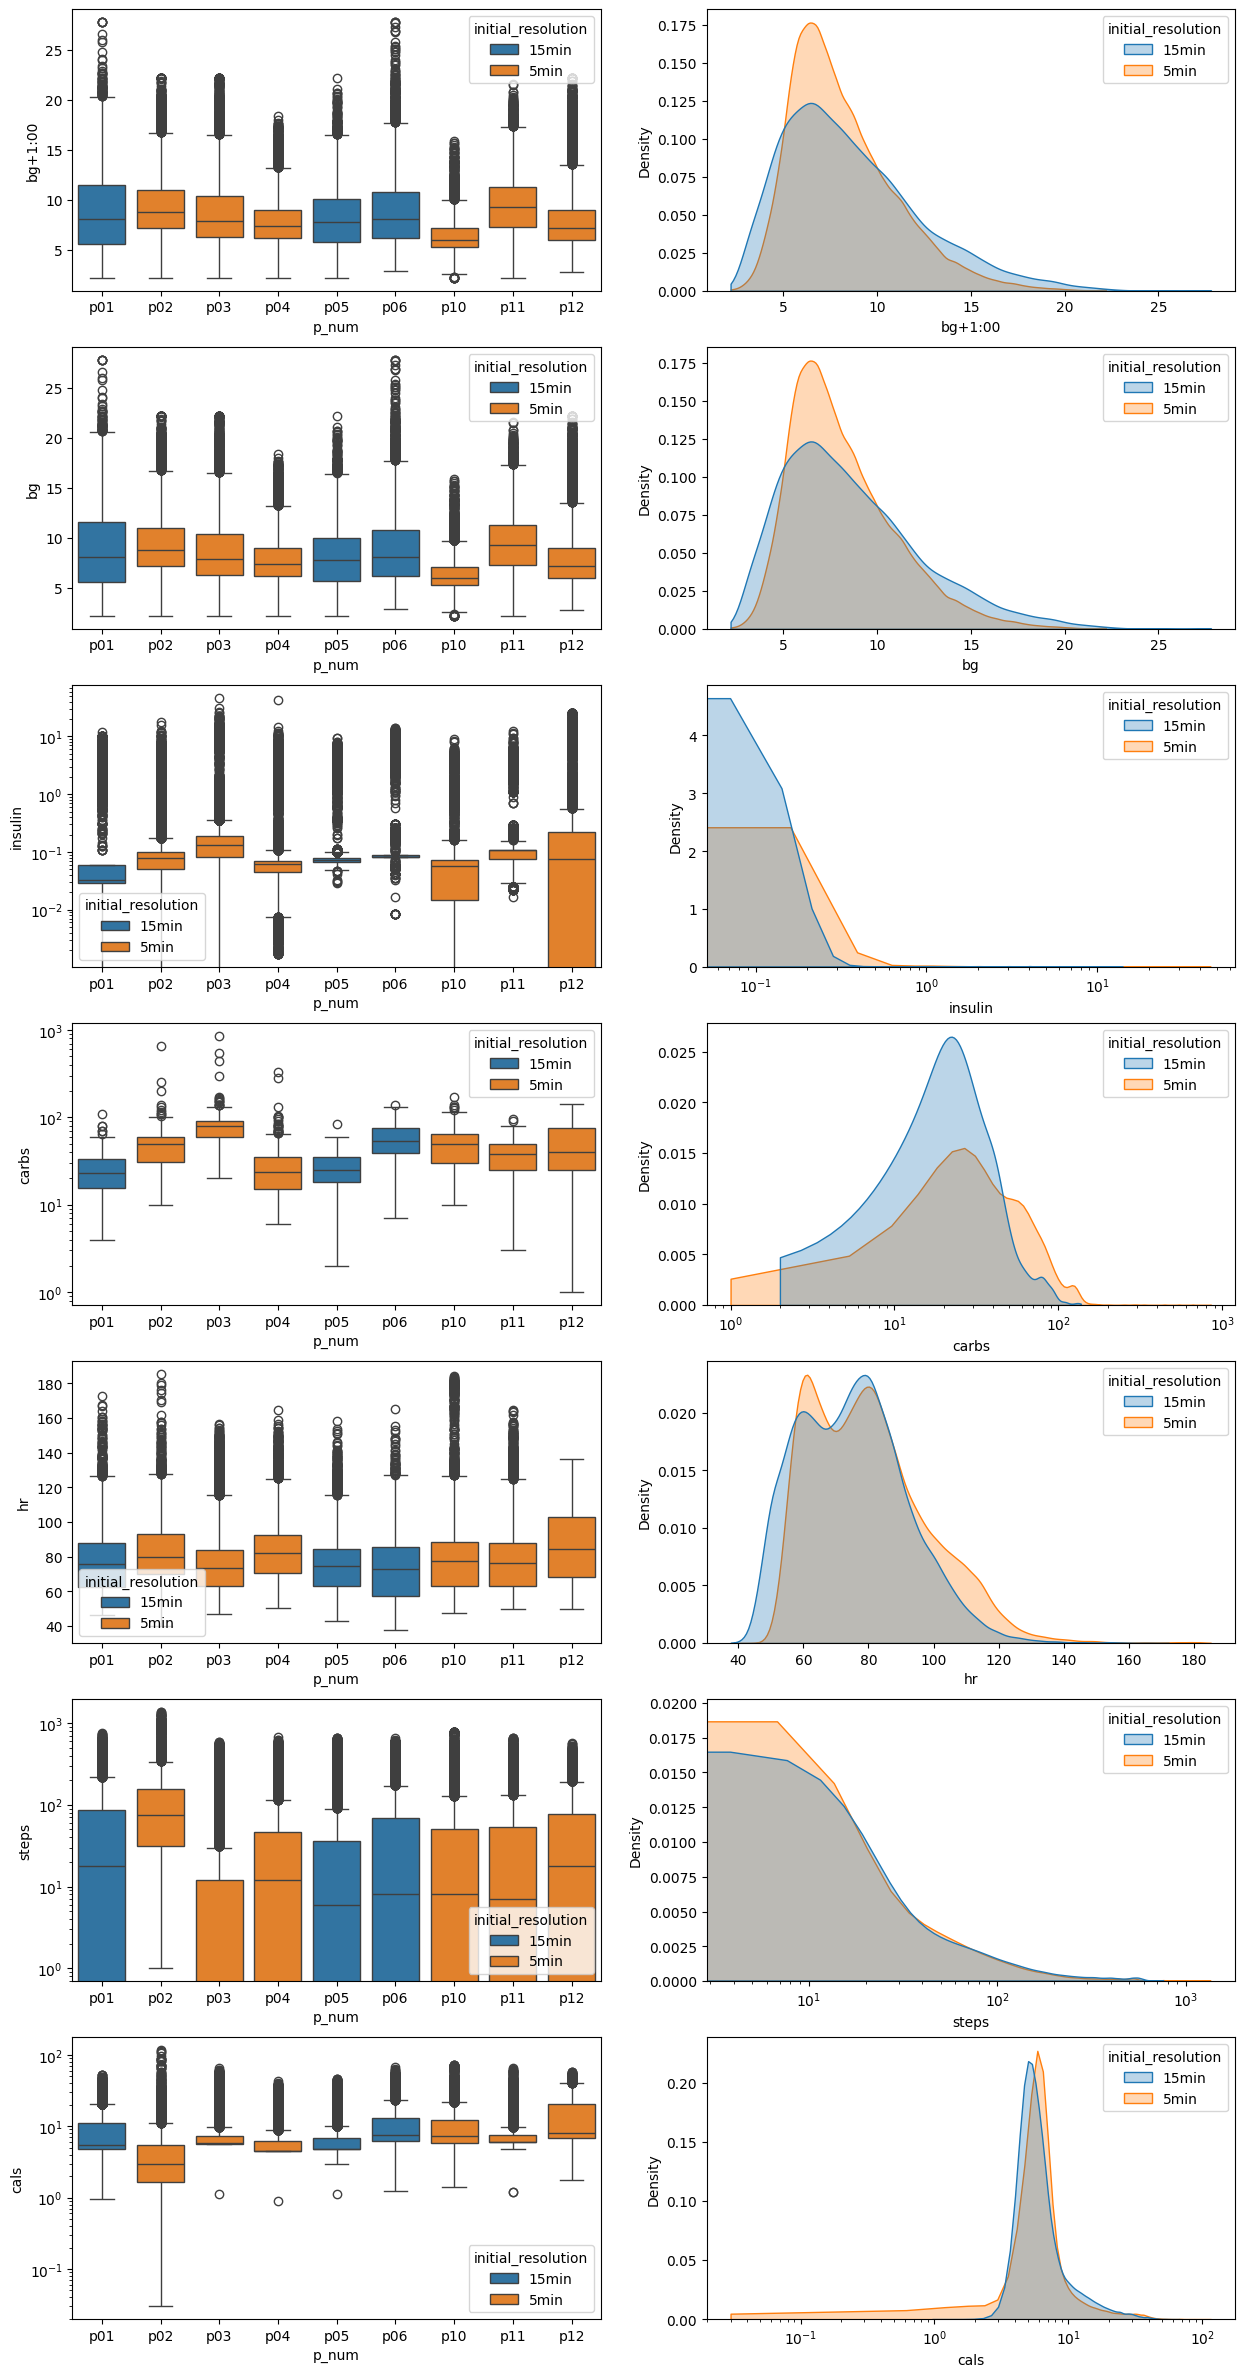

In [7]:
metrics_l = ['bg+1:00','bg','insulin','carbs','hr','steps','cals']

fig,ax = plt.subplots(7,2,figsize=(15,30))
ax_ix = 0

for metric in metrics_l:
    # print( metric )
    sns.boxplot( 
        data = all_train.reset_index() ,
        x = 'p_num' , 
        y = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 0 ] 
        )
    
    sns.kdeplot( 
        data = all_train.reset_index()  , 
        x = metric , 
        hue = 'initial_resolution' , 
        ax = ax[ ax_ix , 1 ] , 
        common_norm = False , 
        fill = True , 
        alpha = .3 ,
        cut = 0
        )
    
    if metric not in ['bg+1:00','bg','hr']:
        ax[ ax_ix , 0 ].set_yscale( 'log' )
        ax[ ax_ix , 1 ].set_xscale( 'log' )

    ax_ix += 1


## Plot the global activity level  ( across all the data set ) for each patient
In the following plot, we count the number of times a given activity is logged by any given patient

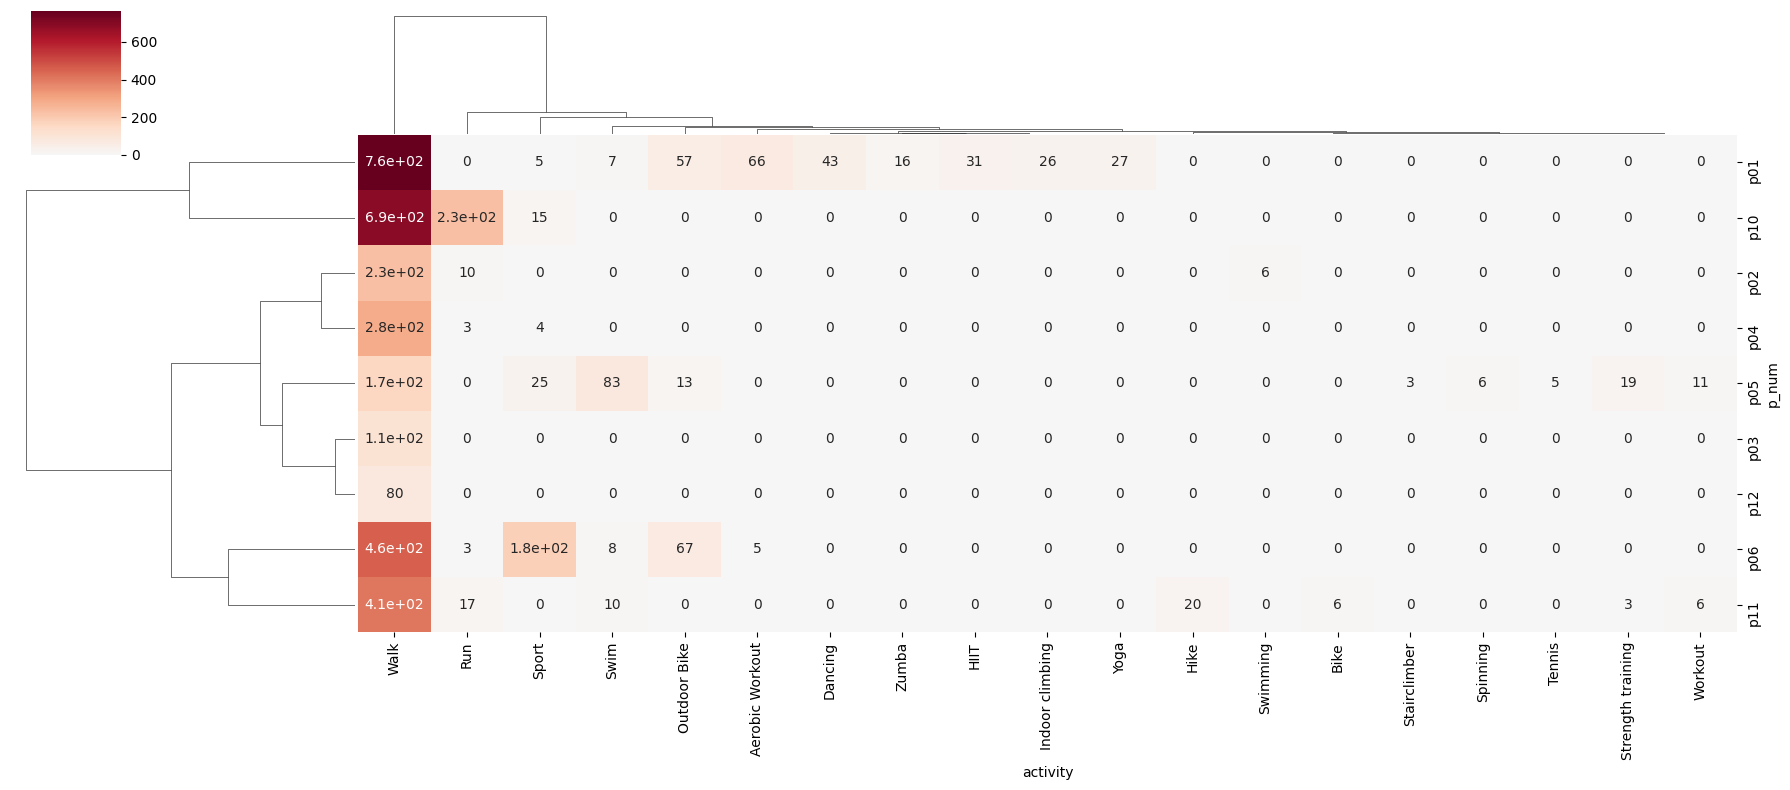

In [4]:
activity_df = pd.crosstab( all_train.p_num , all_train.activity )
sns.clustermap( activity_df , center = 0 , cmap = "RdBu_r" , annot = True , figsize=(18,8) );

## Summary
* The density plots show that non of the variables seem to follow a normal distribution. Rather, many of them look skewed.
* Different patients show highly specific activity patterns. For example, **p01** is more highly active across multiple activities. On the other hand, **p10** is specifically highly active on running.
* The different variables display similar distribution across patients, but with a few relatively minor differences. For example, **p03** tends to have a higher carbohydrate consumption and consequently a higher insulin usage.